# Weighted ECM clustering vs Traditional ECM clustering
## LettersIJL dataset


In [2]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential, ev_plot_2D
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from evclust.datasets import load_letters

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014


     A    B    C    D    E    F    G    H    I     J    K    L    M    N    O  \
0  3.0  7.0  3.0  5.0  1.0  1.0  1.0  5.0  5.0   0.0  1.0  6.0  0.0  8.0  0.0   
1  3.0  4.0  4.0  7.0  1.0  0.0  1.0  6.0  6.0   0.0  0.0  6.0  0.0  8.0  0.0   
2  0.0  0.0  0.0  1.0  0.0  7.0  7.0  4.0  4.0   7.0  6.0  8.0  0.0  8.0  0.0   
3  1.0  4.0  2.0  3.0  1.0  9.0  6.0  2.0  6.0  12.0  4.0  9.0  1.0  7.0  1.0   
4  1.0  7.0  0.0  4.0  0.0  7.0  7.0  4.0  4.0   7.0  6.0  8.0  0.0  8.0  0.0   

     P  
0  8.0  
1  8.0  
2  8.0  
3  7.0  
4  8.0  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


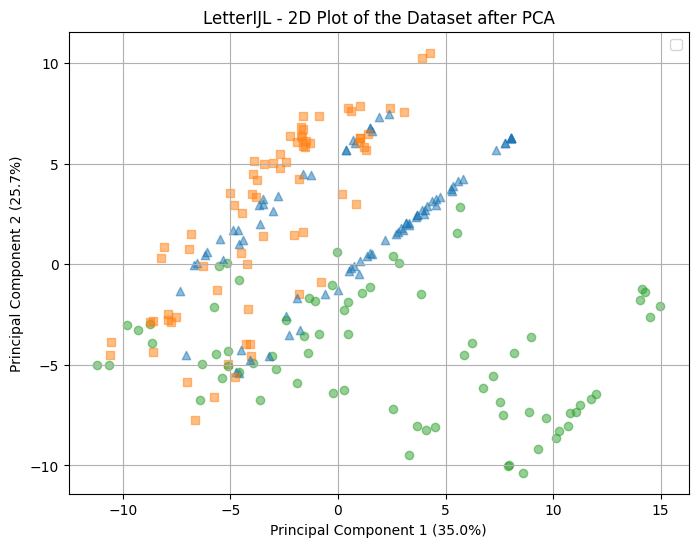

In [3]:
# fetch dataset
df = load_letters()

# data (as pandas dataframes)
y = pd.DataFrame(df.iloc[:, -1])
X = df.iloc[:, :-1]
c = 3

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

markers = ['^', 's', 'o']
plotting(X, y, "LetterIJL", matrix_plot=False, markers=markers)

# Normalization
scaler = MinMaxScaler((0, 1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [7]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta, ntrials=1)
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x : x['crit'])

J values: [35.73481359982617, 35.73481359982617, 35.73481359982617, 35.73481359982617, 35.73481359982617, 35.73481359982617, 35.73481359982617, 35.73481359982617, 35.73481359982617, 35.73481359982617]
ARI values: [0.17842018103609086, 0.17842018103609086, 0.17842018103609086, 0.17842018103609086, 0.17842018103609086, 0.17842018103609086, 0.17842018103609086, 0.17842018103609086, 0.17842018103609086, 0.17842018103609086]
NS values: [1.4178158485951997, 1.4571391501625355, 1.4571391501625355, 1.4178158485951997, 1.459746068497271, 1.4132848559583715, 1.4178158485951997, 1.4571391501625355, 1.4132848559583715, 1.4571391501625355]
NMI values: [0.17394234749061566, 0.17394234749061566, 0.17394234749061566, 0.17394234749061566, 0.17394234749061563, 0.17394234749061566, 0.17394234749061566, 0.17394234749061566, 0.17394234749061566, 0.17394234749061566]


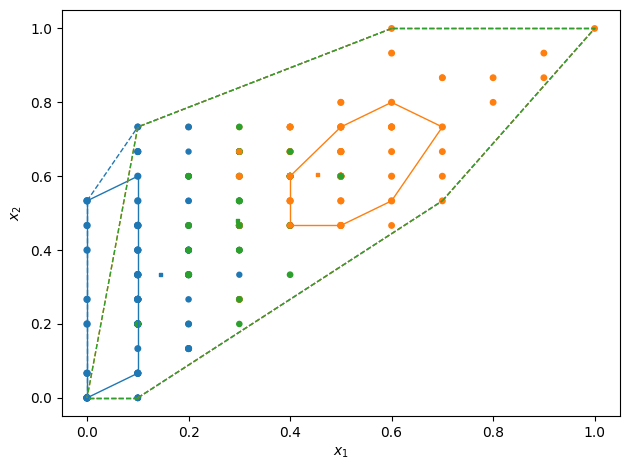

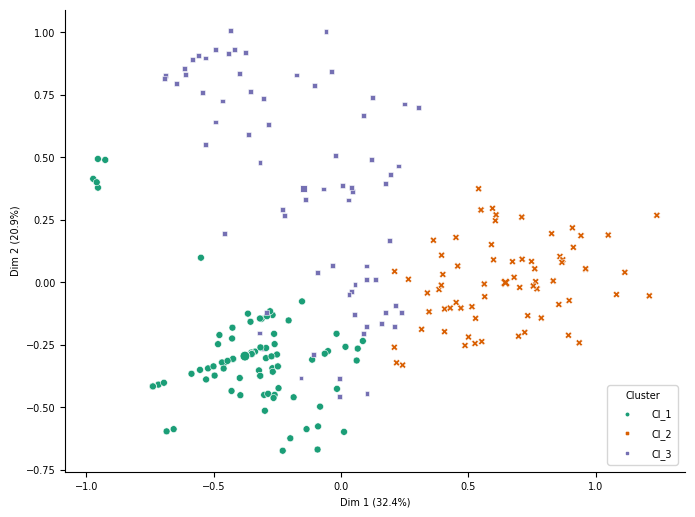

In [8]:
display_results_evidential(X, ecm_models, numeric_labels)

## Weighted ECM (WECM)

In [25]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta)
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [0.05424885961282045, 0.054248859612820555, 0.0542488596128206, 0.05424885961282076, 0.05424885961282076, 0.05424885961282076, 0.05424885961282076, 0.05424885961282091, 0.05424885961282091, 0.05424885961282091]
ARI values: [0.06459926866535472, 0.06459926866535472, 0.06459926866535472, 0.06459926866535472, 0.06459926866535472, 0.06459926866535472, 0.06459926866535472, 0.06459926866535472, 0.06459926866535472, 0.06459926866535472]
NS values: [1.209548891202095, 1.21125355661024, 0.7528299686573795, 1.211402842272257, 1.211402842272257, 1.211402842272257, 1.211402842272257, 1.2150738399386252, 1.2150738399386252, 1.2150738399386252]
NMI values: [0.05914159336376956, 0.05914159336376956, 0.05914159336376956, 0.05914159336376956, 0.05914159336376956, 0.05914159336376956, 0.05914159336376956, 0.05914159336376956, 0.05914159336376956, 0.05914159336376956]


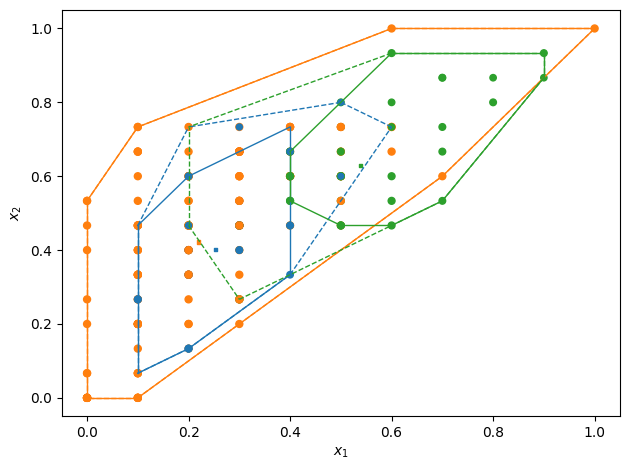

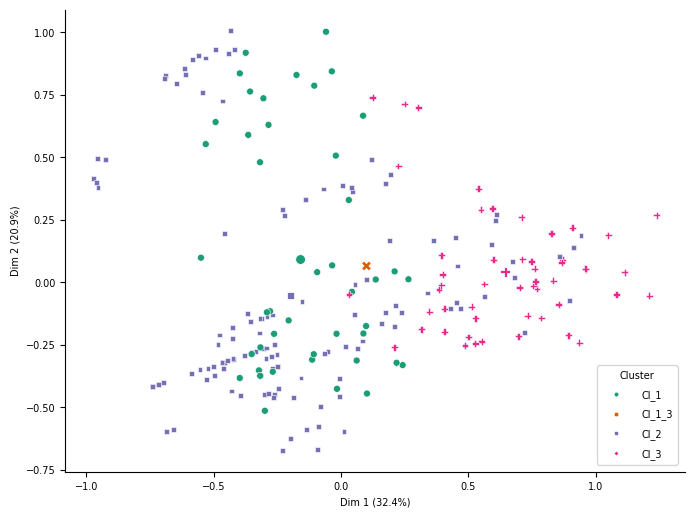

In [26]:
display_results_evidential(X, wecm_models, numeric_labels)

# Weighted FCM - Keller et al. 2000

In [32]:
%%capture
keller_models = np.array([])
# w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, verbose=True)
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key = lambda model : model['obj_func'])

J values: [0.10238818154462448, 0.10239672992706475, 0.10240129887398455, 0.10246809474379118, 0.10254180383395695, 0.1027522705834584, 0.10281363883452077, 0.10292473260961696, 0.1374607240004026, 0.1548401335066828]
ARI values: [0.06459926866535472, 0.06459926866535472, 0.06459926866535472, 0.06459926866535472, 0.06448570084697629, 0.06459048540616646, 0.06459048540616646, 0.06459048540616646, 0.19204039838233025, 0.32532385224283156]
NMI values: [0.05914159336376956, 0.05914159336376956, 0.05914159336376956, 0.05914159336376956, 0.05897582997658007, 0.05964463700729185, 0.05964463700729185, 0.05964463700729185, 0.17565912987978888, 0.34435501954046754]


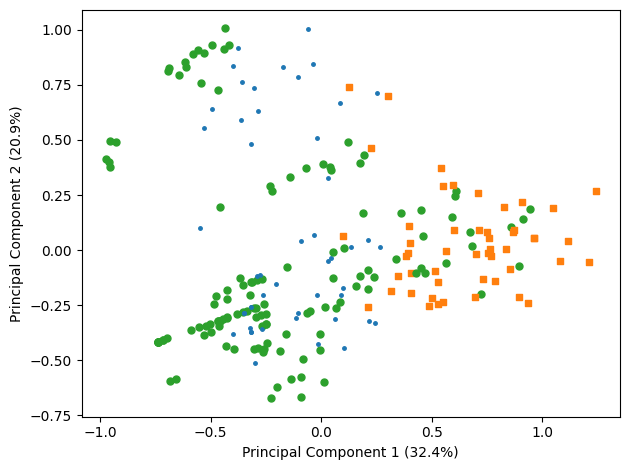

In [33]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [ ]:
%%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=1.85, verbose=True)
    wang_models = np.append(wang_models, model)
wang_models = sorted(wang_models, key = lambda model : model['obj_func'])

J values: [6.561436917348512, 6.561436917348512]
ARI values: [0.2880399359429374, 0.2880399359429374]
NMI values: [0.37031676309047706, 0.370316763090477]


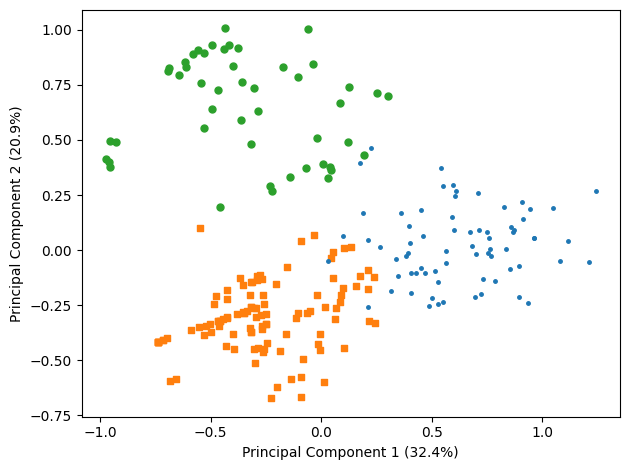

In [5]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [34]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True)
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key = lambda model : model['obj_func'])


J values: [10.455917815923662, 10.455949969222111, 10.455949969222111, 10.455949969222113, 10.455949969222113, 10.455949969222113, 10.455949969222113, 10.455949969222113, 10.455949969222113, 10.455949969222113]
ARI values: [0.2369502168262162, 0.2369502168262162, 0.2369502168262162, 0.2369502168262162, 0.2369502168262162, 0.2369502168262162, 0.2369502168262162, 0.2369502168262162, 0.2369502168262162, 0.2369502168262162]
NMI values: [0.24269961595796222, 0.24269961595796224, 0.24269961595796224, 0.24269961595796222, 0.24269961595796222, 0.24269961595796222, 0.24269961595796224, 0.24269961595796222, 0.24269961595796224, 0.24269961595796224]


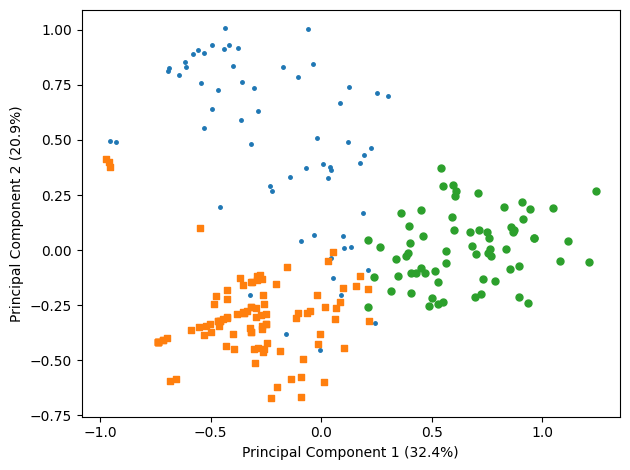

In [35]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [37]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True)
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key = lambda model : model['obj_func'])


J values: [0.1712238592399372, 0.17124026386422875, 0.17124026386422878, 0.17124026386422878, 0.17124026386422878, 0.1712402638642288, 0.1712402638642288, 0.1712402638642288, 0.1712402638642288, 0.1712402638642288]
ARI values: [0.23718962442292502, 0.23718962442292502, 0.23718962442292502, 0.23718962442292502, 0.23718962442292502, 0.23718962442292502, 0.23718962442292502, 0.23718962442292502, 0.23718962442292502, 0.23718962442292502]
NMI values: [0.22412736827404733, 0.22412736827404736, 0.22412736827404736, 0.22412736827404736, 0.22412736827404736, 0.22412736827404733, 0.22412736827404733, 0.22412736827404733, 0.22412736827404733, 0.22412736827404733]


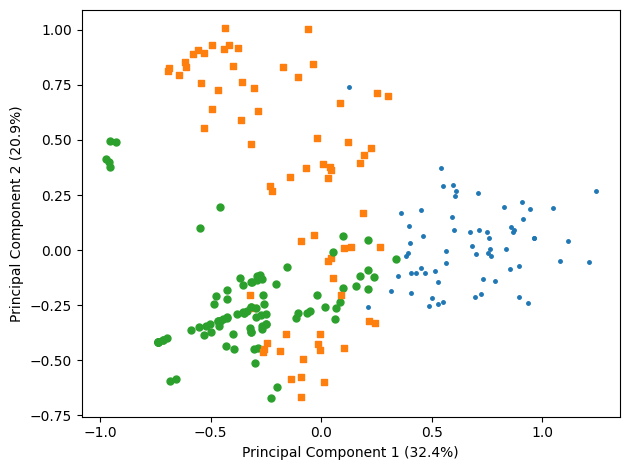

In [38]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [39]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True)
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key = lambda model : model['obj_func'])

J values: [0.21122055827191027, 0.21122734495651202, 0.21122734495651202, 0.21122734495651202, 0.21122734495651208, 0.21122734495651208, 0.21122734495651208, 0.21122734495651208, 0.21122734495651208, 0.21122734495651208]
ARI values: [0.18451323504597428, 0.18451323504597428, 0.18451323504597428, 0.18451323504597428, 0.18451323504597428, 0.18451323504597428, 0.18451323504597428, 0.18451323504597428, 0.18451323504597428, 0.18451323504597428]
NMI values: [0.173260937973887, 0.17326093797388697, 0.17326093797388697, 0.17326093797388697, 0.17326093797388697, 0.17326093797388697, 0.17326093797388697, 0.17326093797388697, 0.17326093797388697, 0.17326093797388697]


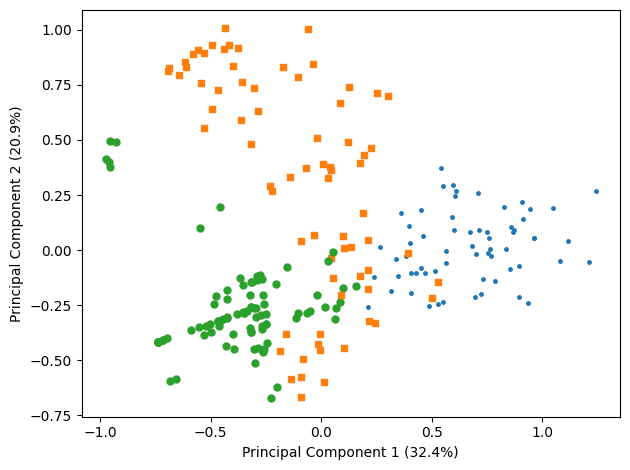

In [40]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [41]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-6)
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key = lambda model : model['obj_func'])

J values: [3.1649157463385977, 3.1649157463385977, 3.1649157463385977, 3.1649157463385977, 3.1649157463385977, 3.1649157463385977, 3.1649157463385977, 3.1649157463385977, 3.1649157463385977, 3.1649157463385986]
ARI values: [0.14749772457990584, 0.14749772457990584, 0.14749772457990584, 0.14749772457990584, 0.14749772457990584, 0.14749772457990584, 0.14749772457990584, 0.14749772457990584, 0.14749772457990584, 0.14749772457990584]
NMI values: [0.13592206360618286, 0.13592206360618284, 0.13592206360618286, 0.13592206360618284, 0.13592206360618284, 0.13592206360618286, 0.13592206360618286, 0.13592206360618284, 0.13592206360618284, 0.13592206360618286]


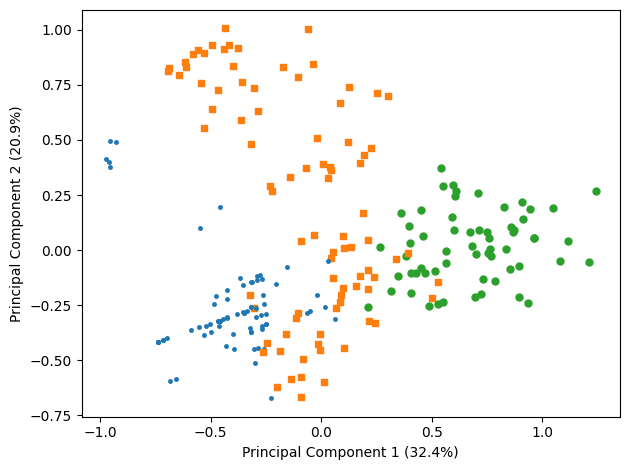

In [42]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)